In [5]:
import pandas as pd



df = pd.read_csv('C:/Users/HP/Desktop/ds/twitter_training.csv')



df.columns = ['id', 'entity', 'sentiment', 'tweet_content']


df.head()


,id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:

df.info()


df.isnull().sum()


df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,id
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:

missing_values = df.isnull().sum()


print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                 0
entity             0
sentiment          0
tweet_content    686
dtype: int64


In [8]:

df = df.dropna()


missing_values_after_cleaning = df.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after_cleaning)

Missing values after cleaning:
 id               0
entity           0
sentiment        0
tweet_content    0
dtype: int64


In [9]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  
    tweet = re.sub(r'\@\w+|\#', '', tweet) 
    tweet = tweet.lower()  
    tweet = re.sub(r'[^\w\s]', '', tweet) 
    tweet_tokens = word_tokenize(tweet) 
    filtered_words = [word for word in tweet_tokens if word not in stopwords.words('english')]  
    return ' '.join(filtered_words)


df['cleaned_tweet'] = df['tweet_content'].apply(preprocess_tweet)


print(df[['tweet_content', 'cleaned_tweet']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                       tweet_content  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                     cleaned_tweet  
0              coming borders kill  
1      im getting borderlands kill  
2     im coming borderlands murder  
3  im getting borderlands 2 murder  
4    im getting borderlands murder  


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')


sid = SentimentIntensityAnalyzer()


def get_sentiment_score(tweet):
    return sid.polarity_scores(tweet)


df['sentiment_scores'] = df['cleaned_tweet'].apply(get_sentiment_score)


df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['cleaned_tweet', 'sentiment_scores', 'compound_score', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                     cleaned_tweet  \
0              coming borders kill   
1      im getting borderlands kill   
2     im coming borderlands murder   
3  im getting borderlands 2 murder   
4    im getting borderlands murder   

                                    sentiment_scores  compound_score sentiment  
0  {'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'comp...         -0.6908  negative  
1  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...         -0.6908  negative  
2  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...         -0.6908  negative  
3  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...         -0.6908  negative  
4  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...         -0.6908  negative  


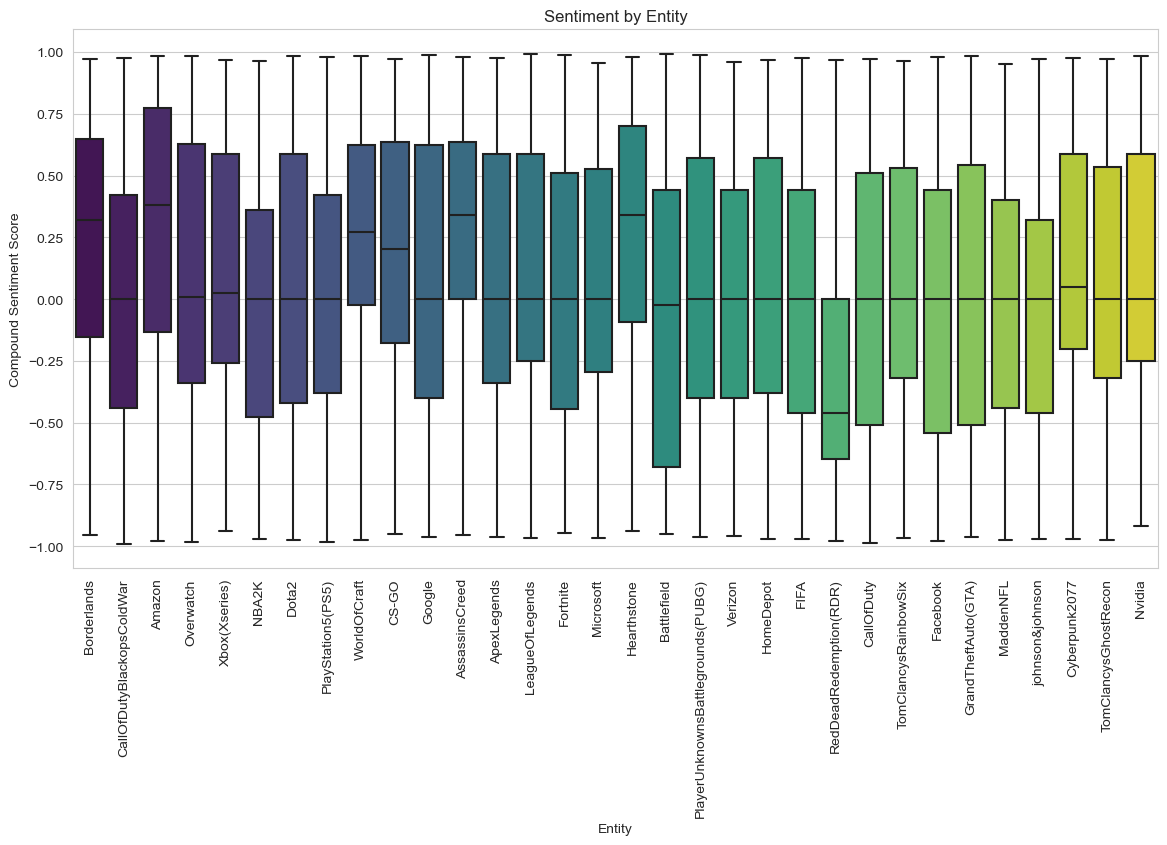

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')




plt.figure(figsize=(14, 7))
sns.boxplot(x='entity', y='compound_score', data=df, palette='viridis')
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=90)
plt.show()

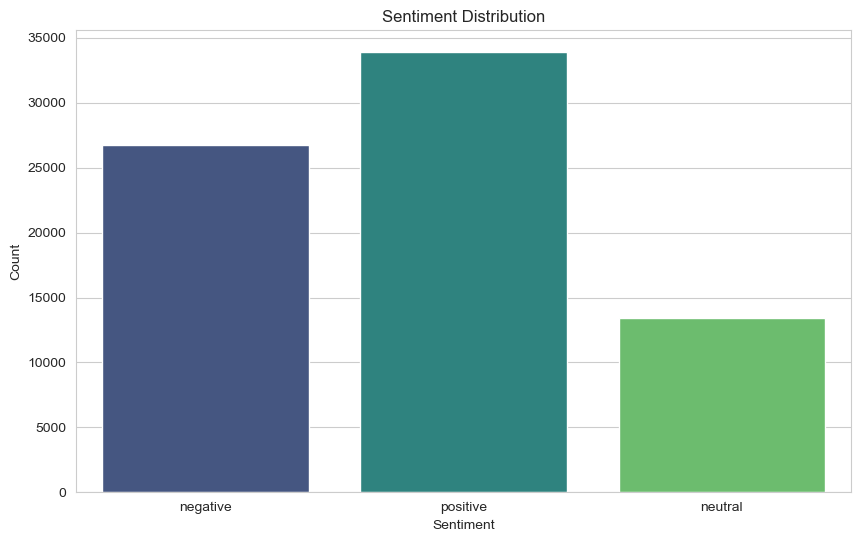

In [12]:

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


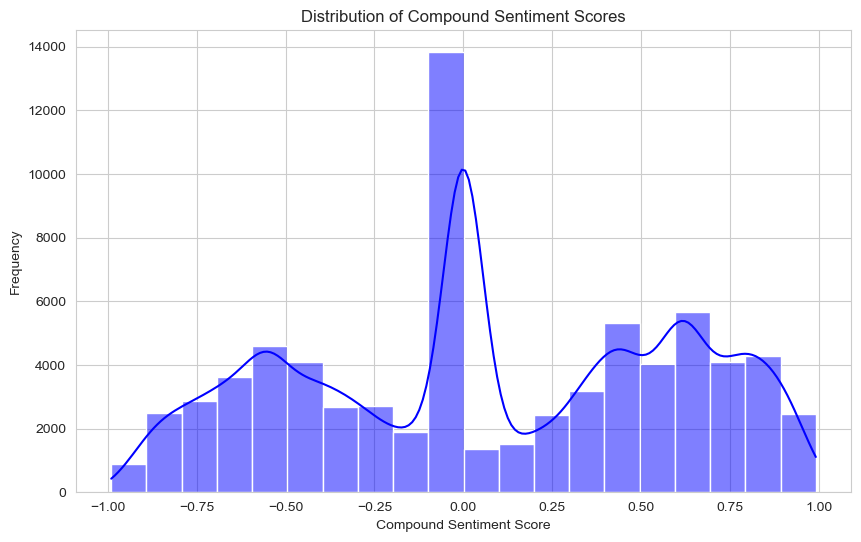

In [13]:
# Plot the distribution of compound sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['compound_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()
